In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import warnings
warnings.filterwarnings("ignore")

c:\Users\Joe\OneDrive\Documents\GitHub\synthetic_dimensions\synth_dim_model.py:362: SyntaxWarning: invalid escape sequence '\d'
  """


In [2]:
N = 2
M = 2

mu = 5
init_J = 0.01
init_V = 0.01

J = 10
V = -1

i = 0
j = 1

t_total = 50
dt = 0.1

n_excited_states = M**N

cmap = plt.get_cmap("gist_rainbow")
colors = [cmap(i / (n_excited_states + 1)) for i in range(n_excited_states + 1)]

adiabatic_energies, adiabatic_diff, adiabatic_wavefunctions, overlaps_all_states, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, t_total, dt)   

sigmas_over_M = []
states, _ = enumerate_states(N, M)
for idx in range(len(times)):
    
        adiabatic_wavefunction = adiabatic_wavefunctions[idx]
        
        sigmas_over_M += [sigma_ij(i = i, j = j, ground_state_wavefunction = adiabatic_wavefunction, states = states, N=N, M=M)/M]
        

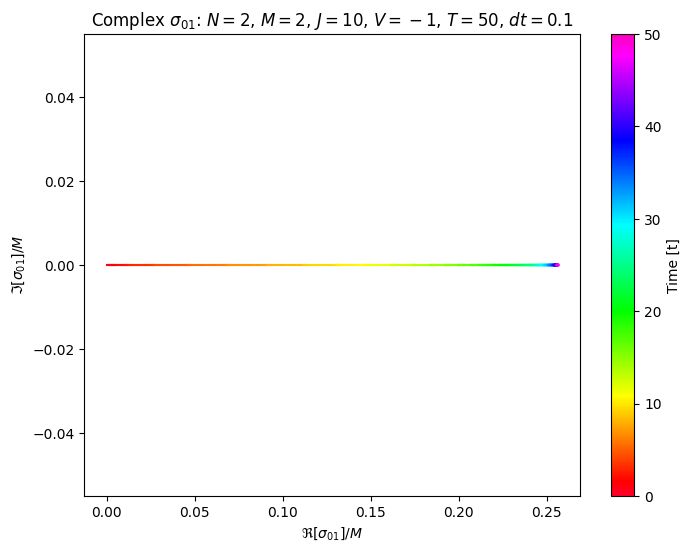

Text(0, 0.5, '$\\sigma_{01}/M$')

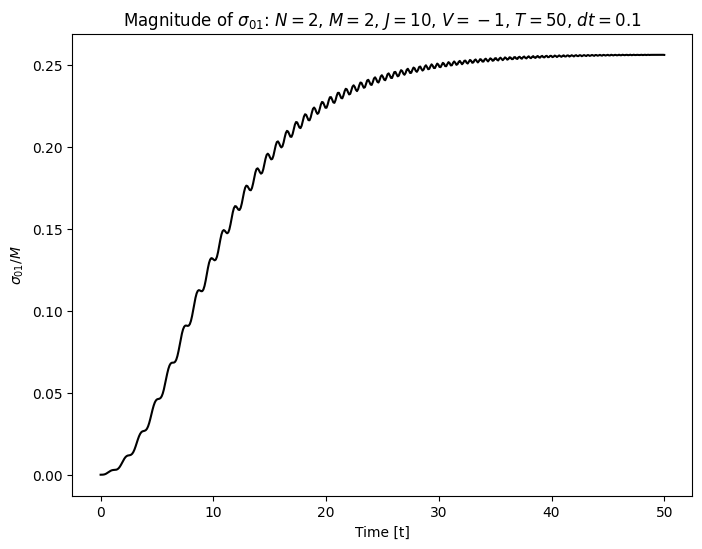

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

norm = plt.Normalize(times.min(), times.max())
cmap = get_cmap('gist_rainbow')

for i in range(len(times) - 1):
    ax.plot(np.real(sigmas_over_M[i:i+2]), np.imag(sigmas_over_M[i:i+2]), color=cmap(norm(times[i])))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time [t]')

ax.set_xlabel("$\Re [\sigma_{01}]/M$")
ax.set_ylabel("$\Im [\sigma_{01}]/M$")
ax.set_title("Complex $\sigma_{01}$:"+f" $N={N}$, $M={M}$, $J = {J}$, $V={V}$, $T={t_total}$, $dt={np.round(dt, 3)}$")

plt.show()

fig, ax = plt.subplots(figsize = (8,6))

ax.plot(times, sigmas_over_M, '-k')

ax.set_title("Magnitude of $\sigma_{01}$:"+f" $N={N}$, $M={M}$, $J = {J}$, $V={V}$, $T={t_total}$, $dt={np.round(dt, 3)}$")
ax.set_xlabel("Time [t]")
ax.set_ylabel("$\sigma_{01}/M$")

Text(0.5, 1.0, '$\\sigma_{01}$: $N=2$, $M=5$, $J = 1$, $V=-1$, $dt=0.1$')

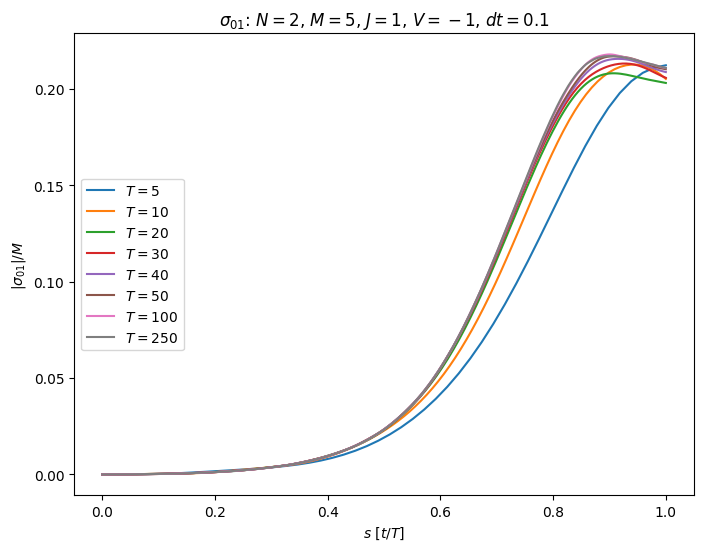

In [4]:
N = 2
M = 5

mu = 5
init_J = 0.01
init_V = 0.01

J = 1
V = -1

i = 0
j = 1

total_times = [5, 10, 20, 30, 40, 50, 100, 250]
total_times = [int(t) for t in total_times]
dt = 0.1

fig, ax = plt.subplots(figsize = (8,6))

for T in total_times:
    adiabatic_energies, adiabatic_diff, adiabatic_wavefunctions, overlaps_all_states, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, T, dt)   
    
    sigmas_over_M = []
    states, _ = enumerate_states(N, M)
    for idx in range(len(times)):
        
            adiabatic_wavefunction = adiabatic_wavefunctions[idx]
            sigmas_over_M += [sigma_ij(i = i, j = j, ground_state_wavefunction = adiabatic_wavefunction, states = states, N=N, M=M)/M]
            
    ax.plot(times/T, np.abs(sigmas_over_M), label = f"$T={T}$")
    
ax.legend(loc="center left")
ax.set_xlabel("$s$ [$t/T$]")
ax.set_ylabel("$|\sigma_{01}|/M$")
ax.set_title("$\sigma_{01}$:"+f" $N={N}$, $M={M}$, $J = {J}$, $V={V}$, $dt={np.round(dt, 3)}$")


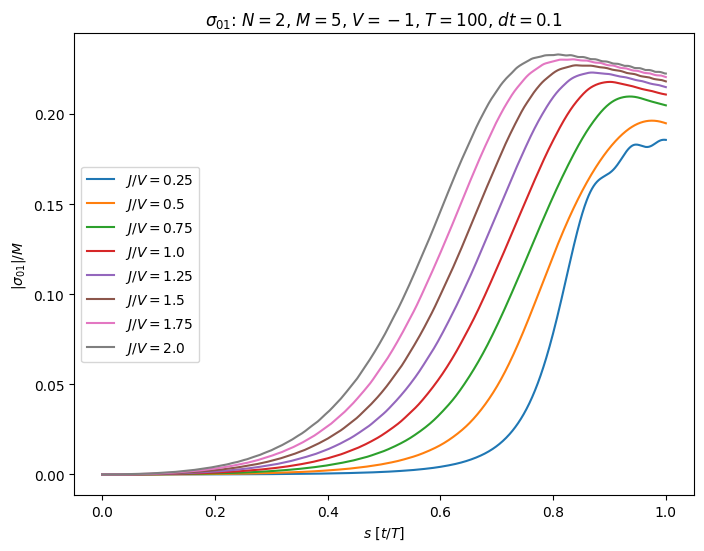

In [5]:
N = 2
M = 5

mu = 5
init_J = 0.01
init_V = 0.01

V = -1
T = 100
dt = 0.1

i = 0
j = 1

J_over_V_ratios = np.arange(0.25, 2.25, 0.25)

fig, ax = plt.subplots(figsize=(8, 6))

for ratio in J_over_V_ratios:
    J = ratio * V
    adiabatic_energies, adiabatic_diff, adiabatic_wavefunctions, overlaps_all_states, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, T, dt)   
    
    sigmas_over_M = []
    states, _ = enumerate_states(N, M)
    for idx in range(len(times)):
        adiabatic_wavefunction = adiabatic_wavefunctions[idx]
        sigmas_over_M += [sigma_ij(i=i, j=j, ground_state_wavefunction=adiabatic_wavefunction, states=states, N=N, M=M)/M]
    
    ax.plot(times/T, np.abs(sigmas_over_M), label=f"$J/V={ratio}$")

ax.legend(loc="center left")
ax.set_xlabel("$s$ [$t/T$]")
ax.set_ylabel("$|\sigma_{01}|/M$")
ax.set_title("$\sigma_{01}$:" + f" $N={N}$, $M={M}$, $V={V}$, $T={T}$, $dt={np.round(dt, 3)}$")

plt.show()
